In [4]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.23 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [6]:
!cp -r '/kaggle/input/face-diagnosis/Face skin health.v1i.yolov8/train' /kaggle/working/
!cp -r '/kaggle/input/face-diagnosis/Face skin health.v1i.yolov8/valid' /kaggle/working/
!cp -r '/kaggle/input/face-diagnosis/Face skin health.v1i.yolov8/test' /kaggle/working/
!cp -r '/kaggle/input/face-diagnosis/Face skin health.v1i.yolov8/data.yaml' /kaggle/working


In [7]:
from ultralytics import YOLO
model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 76.2MB/s]


In [1]:
# model.tune(data='/kaggle/working/data.yaml', epochs=50, iterations=50, optimizer='AdamW', plots=False, save=False, val=False)


In [12]:
model1 = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")
result = model1.predict(source="/kaggle/working/test/images", 
               imgsz=640, iou=.3, save=True, 
               save_txt=True, save_conf=True, show_labels=False)


image 1/4 /kaggle/working/test/images/-QqvXU26S8A_jpg.rf.164dd641c31885239cf79ecc6b7682e6.jpg: 640x640 12 Acnes, 15.2ms
image 2/4 /kaggle/working/test/images/g5kgv03dsq991_jpg.rf.2d02753dd5793ac9dd1e79f193ce0ff4.jpg: 640x640 23 Acnes, 15.3ms
image 3/4 /kaggle/working/test/images/pdfcepea05991_jpg.rf.6793e955bf2e83ee12a0037f8b6649cd.jpg: 640x640 15 Acnes, 15.4ms
image 4/4 /kaggle/working/test/images/pdfcepea05991_jpg.rf.bf20dd774ba7f6fb3b25bc58d5307152.jpg: 640x640 14 Acnes, 15.1ms
Speed: 2.7ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
4 labels saved to runs/detect/predict2/labels


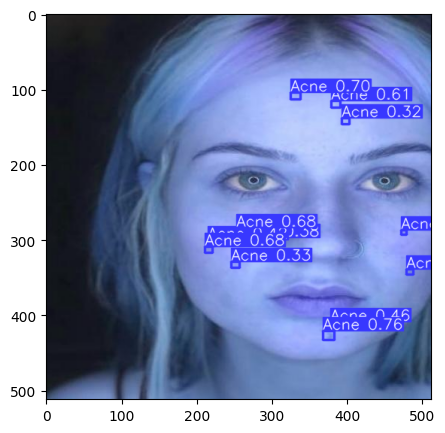

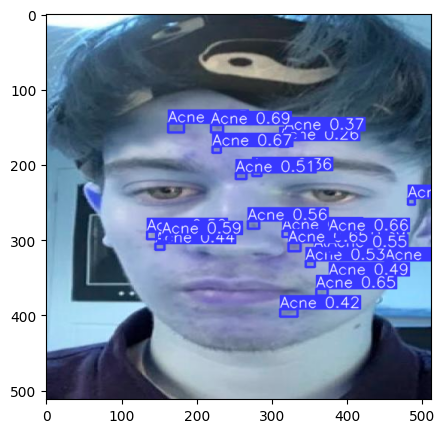

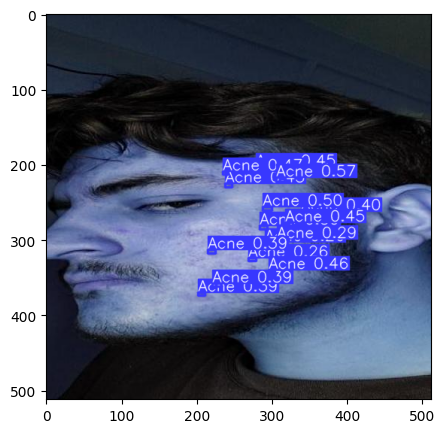

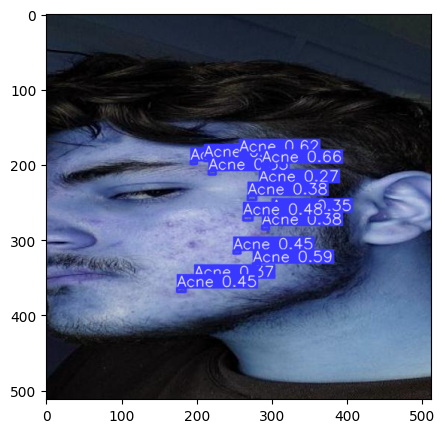

In [13]:
import matplotlib.pyplot as plt

for i in range(len(result)):
    plt.figure(figsize=(5,5))
    plt.imshow(result[i].plot())
    plt.show()

In [8]:
results = model.train(data='/kaggle/working/data.yaml', epochs=200, imgsz=640)


Ultralytics YOLOv8.2.23 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 4.06MB/s]
2024-05-28 07:13:01,050	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-05-28 07:13:02,277	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 21.1MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/train/labels... 71 images, 0 backgrounds, 0 corrupt: 100%|██████████| 71/71 [00:00<00:00, 816.88it/s]

train: New cache created: /kaggle/working/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/valid/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 2578.89it/s]

val: New cache created: /kaggle/working/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      8.74G       3.52      6.735      2.168        205        640: 100%|██████████| 5/5 [00:12<00:00,  2.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all         10        261          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      8.48G      3.533      6.496      2.111        351        640: 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         10        261          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      8.36G      3.457      4.753      1.896        314        640: 100%|██████████| 5/5 [00:02<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         10        261      0.454     0.0255     0.0176    0.00535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      8.55G      3.105      3.631      1.568        323        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         10        261      0.449      0.037     0.0132    0.00383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      8.82G       2.94      3.377      1.577        280        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         10        261      0.452     0.0814     0.0168    0.00437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      8.51G      2.892      3.108      1.478        289        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         10        261      0.591     0.0782     0.0142     0.0034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      8.57G      2.707       2.86       1.49        180        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         10        261      0.491     0.0623     0.0219    0.00764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      8.58G      2.702      2.751      1.391        150        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


                   all         10        261      0.592     0.0831      0.015    0.00489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200       8.7G      2.662      2.536      1.355        141        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all         10        261      0.607     0.0808     0.0204    0.00792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      8.57G      2.564      2.439      1.398         95        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]


                   all         10        261      0.472     0.0616     0.0197    0.00783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      8.64G      2.535      2.231      1.306        244        640: 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         10        261      0.482     0.0565     0.0266    0.00888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      8.59G      2.433      2.207      1.369        132        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         10        261      0.593     0.0977       0.11     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      8.38G      2.378      2.078      1.268        147        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

                   all         10        261      0.561     0.0999      0.106     0.0295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      8.76G      2.449      2.213      1.299        165        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         10        261      0.671     0.0478     0.0922     0.0277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      8.57G      2.343      1.971      1.267        303        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]


                   all         10        261      0.602      0.113     0.0267    0.00657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      8.72G      2.241      1.912      1.244        257        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


                   all         10        261      0.315      0.119     0.0272    0.00752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      8.82G      2.248      1.798      1.294        227        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all         10        261      0.485      0.128     0.0513     0.0158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      8.72G      2.138      1.835      1.283        265        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         10        261      0.268      0.235      0.118     0.0348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      8.41G      2.193      1.832      1.265        118        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all         10        261      0.289      0.228      0.117     0.0331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      8.69G      2.177      1.702      1.228        214        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         10        261      0.468      0.355      0.269     0.0446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      8.56G      2.068      1.733      1.217        178        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all         10        261      0.202     0.0835     0.0532     0.0155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      8.72G      2.219      1.704      1.197        136        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         10        261      0.356      0.108     0.0474     0.0124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      8.43G      2.109      1.647      1.195        269        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         10        261       0.51     0.0615     0.0525     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      8.48G      2.064      1.637      1.131        206        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all         10        261      0.516      0.101     0.0468     0.0176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      8.62G      1.959      1.536      1.257        145        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         10        261      0.347      0.182       0.05     0.0162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      8.44G      2.068      1.529      1.215        382        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         10        261      0.414      0.218      0.203      0.062

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      8.39G      1.898      1.422       1.15        195        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         10        261     0.0501       0.55      0.144      0.062



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      8.65G      1.936      1.429      1.144        161        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         10        261     0.0705      0.536      0.245      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      8.54G      2.113      1.484      1.148        301        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         10        261     0.0976      0.483      0.298      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      8.62G      2.024      1.395       1.14        350        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all         10        261      0.335     0.0466      0.113     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      8.45G      1.946      1.388      1.138        286        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all         10        261     0.0324      0.311      0.216      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      9.03G      2.004      1.447      1.118        204        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         10        261      0.275      0.162      0.263      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      8.36G      1.961      1.365       1.09        184        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]

                   all         10        261      0.134      0.402      0.177     0.0718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      8.62G      1.809      1.213      1.077        200        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         10        261     0.0971      0.309      0.156     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      8.62G       2.02       1.34      1.079        367        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         10        261      0.243       0.17      0.123     0.0493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      8.61G      1.785      1.231       1.09        215        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all         10        261      0.644      0.227      0.385      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      8.49G      1.829      1.205      1.099        352        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         10        261      0.441      0.259      0.375      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      8.47G      1.756      1.172      1.056        213        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         10        261      0.188      0.469      0.383      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      8.64G      1.737      1.133      1.056        212        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


                   all         10        261      0.155      0.311      0.206      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      8.64G      1.708      1.121      1.031        228        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         10        261      0.256      0.139       0.16     0.0445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      8.48G      1.665      1.091      1.077        232        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

                   all         10        261      0.175      0.195      0.134     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      8.62G      1.723      1.122      1.028        363        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all         10        261      0.161      0.196      0.148     0.0516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      8.41G      1.641      1.072      1.011        435        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all         10        261      0.401      0.297      0.296      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      8.38G        1.5     0.9732      1.033        216        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         10        261      0.594      0.251      0.285      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      8.61G      1.655      1.083      1.103        154        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         10        261       0.57      0.255      0.276      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      9.11G      1.611      1.052      1.054        195        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         10        261      0.541      0.267      0.282      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200       8.7G      1.696      1.053      1.029        234        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         10        261       0.56      0.265      0.285      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200       8.6G      1.729      1.081      1.066        180        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

                   all         10        261       0.56      0.257      0.296      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      8.35G       1.67      1.062      1.044        265        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         10        261       0.58      0.422      0.364      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      8.64G       1.63      1.017      1.013        220        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         10        261      0.567      0.393      0.369      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      8.61G      1.567     0.9994     0.9982        223        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         10        261      0.518      0.248      0.327      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      8.64G      1.575     0.9812      1.001        209        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


                   all         10        261      0.366      0.285       0.28      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      8.35G      1.501     0.9262      1.005        263        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         10        261      0.425      0.439      0.346      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      8.47G      1.693     0.9892     0.9898        361        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         10        261       0.59      0.357      0.351      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      8.61G      1.595     0.9504     0.9876        277        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         10        261      0.606       0.36      0.351      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      8.39G      1.467     0.9164     0.9711        111        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         10        261      0.608      0.451      0.427      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      8.61G      1.549     0.9432     0.9807        203        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

                   all         10        261      0.792      0.403      0.492      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      8.65G      1.487     0.8889     0.9406        195        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         10        261      0.495      0.273      0.347      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      8.42G      1.536      0.935     0.9737        425        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         10        261      0.643      0.272      0.343        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      8.75G       1.57     0.9676      1.018        156        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         10        261      0.416      0.427      0.418      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      8.38G      1.388     0.8538      0.953        236        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         10        261      0.462       0.49      0.444      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      8.39G      1.279     0.8017      0.954        182        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all         10        261      0.476      0.495      0.451      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      8.74G      1.403     0.8553     0.9962         88        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all         10        261      0.475      0.495      0.458      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      8.59G       1.48     0.8703     0.9545        360        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         10        261       0.45      0.506      0.456       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      8.54G      1.386     0.8489     0.9806        324        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all         10        261      0.477       0.49      0.462      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      8.58G      1.419     0.8351     0.9273        185        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         10        261       0.59      0.504      0.454      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      8.64G      1.393     0.8252     0.9224        274        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         10        261      0.575      0.469      0.451      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      8.41G      1.345     0.8074     0.9489        223        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         10        261      0.522      0.476       0.48      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      8.31G      1.471     0.8628     0.9433        374        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         10        261      0.539       0.48      0.595      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      8.68G      1.375     0.8121      0.931        198        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         10        261      0.569      0.492      0.524      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      8.47G      1.422     0.8569     0.9532        217        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


                   all         10        261      0.482      0.458      0.444      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      8.56G       1.27     0.7752      0.947        162        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         10        261      0.509      0.446      0.427      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      8.36G      1.287     0.7517     0.9149        151        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         10        261       0.35      0.447      0.426       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      8.62G      1.349     0.7732     0.9305        342        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         10        261      0.361      0.455       0.41      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      8.67G      1.197      0.738     0.9352        205        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         10        261      0.342      0.464      0.417      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      8.47G      1.341     0.7817     0.9175        167        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all         10        261      0.625      0.292      0.484      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      8.55G      1.294     0.7674     0.9255        315        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         10        261      0.586      0.292      0.497      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      8.71G      1.187     0.7181     0.9311        264        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all         10        261      0.499      0.348        0.5      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      8.62G      1.294      0.742     0.9063        172        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         10        261      0.311      0.328      0.345      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      8.46G      1.313     0.7934     0.9257        164        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         10        261      0.365      0.462      0.417      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      8.57G      1.454     0.8287     0.9452        293        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         10        261      0.452        0.3      0.338      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200       8.4G      1.144     0.6706      0.927        128        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         10        261      0.329      0.328      0.343      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      9.12G      1.257     0.7301     0.8992        381        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all         10        261      0.378      0.327       0.35      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      8.44G      1.273     0.7444      0.889        251        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         10        261      0.712      0.337      0.507        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      8.59G      1.216     0.6979     0.8867        273        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         10        261      0.739      0.345      0.513      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      8.68G      1.268     0.7184     0.8937        275        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         10        261      0.592      0.347      0.442      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      8.68G      1.226      0.693     0.9139        186        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         10        261      0.536      0.325      0.436      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      8.61G      1.279     0.7355     0.8977        302        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         10        261      0.306       0.74      0.574      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      8.35G      1.114     0.6409     0.9045        191        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         10        261      0.482      0.339      0.373      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      9.22G       1.35     0.7609     0.9038         99        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         10        261      0.332      0.347      0.374      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      8.47G      1.123      0.666     0.8884        153        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all         10        261      0.505        0.3      0.382      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      8.77G      1.231     0.7134     0.8814        317        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         10        261      0.544      0.467      0.508      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      8.63G      1.161     0.6646     0.8699        385        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         10        261      0.542      0.468      0.512      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      8.47G      1.046     0.6165      0.858        230        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         10        261      0.524      0.471      0.515      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      8.64G      1.208     0.6909     0.8802        265        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         10        261      0.477      0.499      0.517      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      8.63G      1.154     0.6468     0.8774        270        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         10        261       0.45      0.496      0.507      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      8.69G      1.159      0.667     0.8801        187        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]

                   all         10        261      0.667      0.416      0.497       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200       8.7G     0.9506     0.5677     0.8552        154        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         10        261      0.671      0.413      0.506      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      8.48G      1.169      0.658     0.8647        434        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         10        261      0.643       0.42      0.507      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      8.58G        1.1     0.6309     0.8885        230        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         10        261      0.336      0.339      0.352      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200       8.5G      1.072     0.6231     0.8875        147        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         10        261      0.366      0.343      0.369       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      8.58G      1.204     0.6714     0.8714        278        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         10        261      0.389      0.336      0.369      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      8.44G      1.112     0.6499     0.8896        316        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         10        261      0.421      0.353      0.366      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200       8.7G      1.174     0.6634     0.8753        374        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all         10        261      0.599      0.431      0.516      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      8.31G      1.098     0.6229     0.8643        290        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]

                   all         10        261      0.613      0.425      0.538      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200       8.6G      1.045     0.5972     0.8706        254        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all         10        261      0.512      0.523      0.549      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      8.46G      1.162      0.643     0.8606        415        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         10        261       0.54      0.522      0.553       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      8.62G      1.097     0.6312     0.8536        200        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

                   all         10        261      0.547      0.437      0.523      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      8.49G     0.9818     0.5684     0.8682        142        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         10        261      0.664      0.465      0.662      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      8.65G      1.006     0.5896     0.8645        208        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         10        261      0.607      0.491      0.658      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      8.45G     0.9862     0.5613     0.8755        137        640: 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         10        261      0.527       0.57      0.677      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      8.63G      1.093       0.61     0.8477        294        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         10        261      0.682      0.396      0.684      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      8.59G      1.041     0.5847     0.8722        258        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         10        261      0.543      0.391      0.548      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      8.56G      1.114     0.6216     0.8616        268        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         10        261      0.428      0.589      0.551      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      8.77G       1.11     0.6208     0.8643        141        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         10        261      0.413       0.59      0.551      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      8.58G      1.021     0.6048     0.8476        255        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         10        261      0.452      0.441      0.556      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      8.32G     0.9609     0.5589     0.8718        117        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         10        261      0.562      0.399      0.555      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      8.65G       1.01     0.5776      0.862        212        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]

                   all         10        261      0.555      0.402      0.557      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200       8.6G      1.068     0.5895     0.8767        188        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         10        261      0.573      0.397      0.559       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      8.46G      1.083     0.6056     0.8523        336        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         10        261      0.582      0.409      0.566      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200       8.6G      1.104      0.607     0.8561        290        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all         10        261      0.564      0.415      0.565      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      8.62G      1.042     0.6049     0.8617        353        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         10        261        0.5      0.433      0.566       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      8.71G      1.099     0.6129     0.8678        300        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]

                   all         10        261      0.477      0.568      0.563      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      8.43G      1.084     0.5946     0.8588        173        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

                   all         10        261      0.553      0.552      0.563       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200       8.5G     0.9674       0.57     0.8562        166        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         10        261      0.559      0.554      0.566       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      8.42G      1.061     0.6114     0.8495        346        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         10        261      0.581      0.546      0.568      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      8.46G          1     0.5517     0.8646        369        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         10        261      0.576      0.548      0.568      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      8.46G     0.9484     0.5551     0.8558        179        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         10        261      0.569      0.552      0.571      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      8.49G      1.016     0.5748     0.8569        202        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         10        261      0.565      0.547      0.568      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      8.41G      1.098     0.6081     0.8523        413        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

                   all         10        261      0.561      0.555      0.576       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      8.71G      1.085     0.5964      0.847        176        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all         10        261      0.556      0.574      0.578       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      8.42G      1.092     0.6185     0.8731        172        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

                   all         10        261      0.547      0.562      0.573      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      8.36G      1.035     0.5645     0.8522        360        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         10        261       0.54      0.563      0.573      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      8.59G      1.007     0.5489     0.8636        200        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         10        261      0.397      0.423      0.427      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      8.46G     0.9512     0.5241     0.8481        300        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all         10        261      0.562      0.568      0.574      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      9.09G      0.957     0.5396     0.8493        219        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all         10        261      0.575      0.561      0.572      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      8.32G      1.056     0.6103     0.8691        173        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         10        261      0.582      0.563      0.573      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      8.75G      1.068     0.5847     0.8453        286        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

                   all         10        261      0.577      0.556      0.573      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      8.47G      1.001     0.5524     0.8414        208        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]


                   all         10        261      0.565      0.567      0.569      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      8.63G     0.9913     0.5594     0.8643        237        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

                   all         10        261      0.551      0.554      0.567      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      8.35G     0.9512     0.5346     0.8335        308        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         10        261      0.549      0.559      0.568      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      8.62G     0.8513     0.4954     0.8369        168        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         10        261       0.55      0.549      0.569      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      8.75G     0.8811     0.4947     0.8477        243        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         10        261      0.567      0.543      0.568      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      8.57G      1.053     0.5691     0.8385        346        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         10        261      0.613      0.521      0.569      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      8.49G     0.9295     0.5253     0.8366        285        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         10        261      0.592      0.537      0.571      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      8.72G     0.8941     0.5189     0.8473        137        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         10        261      0.592      0.545      0.573      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      8.44G     0.9659     0.5354     0.8438        270        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

                   all         10        261      0.573      0.548      0.566      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      8.62G     0.9149     0.5218     0.8398        163        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         10        261      0.525      0.588      0.568      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      8.36G     0.8796      0.491     0.8335        181        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]

                   all         10        261      0.513      0.593      0.571      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      8.58G     0.9158     0.5239     0.8399        292        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all         10        261      0.524      0.451      0.572      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      8.59G     0.8765     0.4927     0.8378        163        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all         10        261      0.517      0.593      0.568      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      8.45G     0.9732     0.5316      0.836        249        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         10        261      0.498       0.59      0.565      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      8.36G      0.835     0.4752     0.8249        313        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         10        261       0.43      0.589      0.566      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      8.62G     0.9063      0.507     0.8319        204        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         10        261       0.44      0.592      0.565      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      8.46G      0.898     0.4937     0.8288        300        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         10        261      0.435      0.586      0.566      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      8.43G     0.8538     0.4905     0.8422        313        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         10        261      0.457      0.588      0.571      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      8.36G     0.9811     0.5467     0.8435        138        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         10        261      0.463      0.591      0.571      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200       8.6G     0.9174     0.5287     0.8292        303        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]

                   all         10        261      0.456      0.591       0.57      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      8.64G      0.942     0.5483     0.8415        153        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all         10        261      0.437      0.591       0.57       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      8.59G     0.8925     0.5053      0.847        171        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all         10        261      0.512       0.58       0.57      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      8.59G     0.9084     0.5092     0.8356        169        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


                   all         10        261      0.565      0.567      0.573      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      8.66G     0.7951     0.4607     0.8326        152        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         10        261       0.59      0.564      0.576      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      8.63G     0.8178     0.4734     0.8393         83        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         10        261      0.592      0.562      0.575      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      8.58G     0.9443     0.5107     0.8449        197        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         10        261      0.598      0.553      0.574      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      8.31G     0.8002     0.4681      0.819        224        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all         10        261      0.574      0.564      0.575      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      8.79G     0.8599     0.4868     0.8411        195        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         10        261      0.504      0.581      0.573      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      8.78G     0.8977     0.5089     0.8362        212        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         10        261      0.466      0.591      0.575      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      8.56G     0.8342      0.489     0.8414        209        640: 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         10        261       0.49      0.589      0.573      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      8.37G     0.9877     0.5448     0.8225        473        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         10        261       0.55      0.575      0.576      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      8.66G     0.7592     0.4327     0.8209        324        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         10        261      0.568      0.566      0.576      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      8.63G     0.8312     0.4827     0.8413        114        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         10        261      0.572      0.571      0.575      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      8.63G     0.9301     0.5148     0.8287        237        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all         10        261      0.578      0.564      0.579       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      8.36G     0.8555     0.4903     0.8359        216        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all         10        261      0.598      0.559      0.578      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      8.62G     0.9134     0.5042     0.8269        403        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all         10        261      0.595      0.556      0.576      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200       8.6G     0.7905     0.4461     0.8135        211        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         10        261      0.592      0.553      0.576      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      8.47G     0.7737     0.4417      0.809        300        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all         10        261      0.621      0.549      0.579      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      8.65G     0.9652      0.534     0.8424        185        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         10        261      0.615       0.55      0.581      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      8.47G     0.7916     0.4476     0.8213        150        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all         10        261      0.606      0.554      0.583      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      8.78G     0.8443     0.4769      0.839        246        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         10        261      0.611      0.556      0.585      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      8.59G     0.8227     0.4625     0.8172        213        640: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         10        261      0.609       0.56      0.583      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      8.47G     0.7678     0.4433     0.8218        289        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

                   all         10        261      0.611      0.559      0.581      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      8.63G     0.8718     0.4968     0.8238        350        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         10        261       0.62      0.552       0.58      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      8.73G     0.7762      0.447     0.8231        184        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         10        261      0.667      0.554       0.58       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200       8.6G     0.8612      0.492     0.8116        346        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         10        261      0.655      0.562       0.58      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      8.51G     0.8549       0.48     0.8236        242        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

                   all         10        261      0.671      0.561       0.58      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      8.59G     0.8533     0.4891     0.8284        277        640: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all         10        261      0.657       0.56       0.58      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      8.65G     0.7995      0.453     0.8151        232        640: 100%|██████████| 5/5 [00:02<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

                   all         10        261      0.664      0.558      0.581       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      8.74G     0.7922      0.443     0.8126        230        640: 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

                   all         10        261      0.655      0.561      0.584      0.312


EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 88, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

188 epochs completed in 0.253 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.23 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 218 layers, 25847287 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]


                   all         10        261      0.306       0.74      0.574      0.342
                  Acne         10        224      0.082      0.683       0.54      0.211
             Blackhead         10         30     0.0577        0.5      0.225      0.067
               Pimples         10          1          1          1      0.995      0.697
            acne_scars         10          1          0          0          0          0
             blackhead         10          3       0.25          1      0.764      0.428
                cystic         10          1        0.5          1      0.497     0.0995
             whitehead         10          1       0.25          1      0.995      0.895
Speed: 0.2ms preprocess, 13.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train
